In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key

In [5]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
requests.__version__

'2.24.0'

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform (-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-55.11557783694239 -60.61913856739564
-9.36381322918514 30.50616849769645
21.324960060044134 -13.868956361044923
-54.927830533757394 110.53970179480501
58.414443844529956 -143.0694314702355
-56.69342333956439 -95.1599211581535
80.73379749616268 -108.99376591601562
36.725346990591646 -140.39599928704857
32.391846260206464 58.79796642335077
-16.603897630026765 5.731624071213787
-15.733873215528533 18.754786765974217
-13.115184481062954 91.42370707694329
-21.728325379370347 -74.33945637241303
-43.82631032184544 41.72822551135485
9.661795980169273 -49.124473246848396
15.214539612657731 112.11314707020574
84.99794634323843 21.74025313537325
73.89758821804503 -131.9594413873448
-70.45586758938207 -119.10958930355528
22.740452095959697 40.8068404044505
78.49543458659289 -130.7818948963792
15.537885817325673 -12.336368594387181
-33.874280241228675 -10.568788025073928
66.64937234361557 177.8793769928797
-37.060596547294644 136.08491946982923
67.02662300674919 -120.09417755739382
20.036948595113

22.249058675729643 -31.746935418524544
-2.1735903564868835 65.23360160243496
9.898861573060628 36.92970383389252
15.546635302771662 -65.25992042723978
-81.2451157857188 -99.36007465466501
37.51756431739142 -76.64849387877058
-65.89302189232686 176.99009733817746
32.95288852037473 108.3873247773829
-79.20221156873725 -68.06836342593898
-4.020771618162229 173.0710011613793
3.1697304750873627 -52.9404268988022
-70.19062607319668 -11.216727109467541
69.57986320867266 166.49493186143366
-76.81384128627188 149.34474997417203
-73.89405978392408 47.1529218233085
78.9148714856332 -91.51948712748023
7.6145884611713655 -99.43956868192515
-38.410940021168216 -143.25552614390472
-65.0561064369659 139.78978108791898
-62.905970877664515 73.44000200104111
2.5320852436892665 -21.571407500394656
54.898061460080726 -121.42422616668912
25.218906894325997 -16.94614527900214
22.706031882926325 92.6653805580566
-1.1155135081715741 -45.40073743853122
-1.0847811985903775 -123.13733456720044
35.66352034826173 -

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [18]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | mporokoso
Processing Record 3 of Set 1 | atar
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | haines junction
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | birjand
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | menongue
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | tocopilla
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | cayenne
Processing Record 16 of Set 1 | qui nhon
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | mecca
Processing Record 21 of Set 1 | maghama
City not found. Skipping...
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | anadyr
Processing Record 24 of Set 1 | po

Processing Record 41 of Set 4 | kapit
Processing Record 42 of Set 4 | erzin
Processing Record 43 of Set 4 | umkomaas
Processing Record 44 of Set 4 | elat
Processing Record 45 of Set 4 | half moon bay
Processing Record 46 of Set 4 | daru
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | veraval
Processing Record 49 of Set 4 | udalguri
Processing Record 50 of Set 4 | nurota
Processing Record 1 of Set 5 | korla
City not found. Skipping...
Processing Record 2 of Set 5 | nikolskoye
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | acapulco
Processing Record 5 of Set 5 | port blair
Processing Record 6 of Set 5 | puerto boyaca
Processing Record 7 of Set 5 | barbar
City not found. Skipping...
Processing Record 8 of Set 5 | puerto suarez
Processing Record 9 of Set 5 | kavieng
Processing Record 10 of Set 5 | griffith
Processing Record 11 of Set 5 | christchurch
Processing Record 12 of Set 5 | santa cruz
Processing Record 13 of Set 5 | torres
Processing Reco

Processing Record 28 of Set 8 | oktyabrskiy
Processing Record 29 of Set 8 | chifeng
Processing Record 30 of Set 8 | sao jose da coroa grande
Processing Record 31 of Set 8 | samokov
Processing Record 32 of Set 8 | fairbanks
Processing Record 33 of Set 8 | kailua
Processing Record 34 of Set 8 | buraydah
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | zhaodong
Processing Record 37 of Set 8 | quatre cocos
Processing Record 38 of Set 8 | lazaro cardenas
Processing Record 39 of Set 8 | tommot
Processing Record 40 of Set 8 | san rafael
Processing Record 41 of Set 8 | adrar
Processing Record 42 of Set 8 | atsiki
City not found. Skipping...
Processing Record 43 of Set 8 | mildura
Processing Record 44 of Set 8 | erenhot
Processing Record 45 of Set 8 | sozimskiy
Processing Record 46 of Set 8 | pocos de caldas
Processing Record 47 of Set 8 | warqla
City not found. Skipping...
Processing Record 48 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 49 of Se

Processing Record 18 of Set 12 | bathsheba
Processing Record 19 of Set 12 | naze
Processing Record 20 of Set 12 | oussouye
Processing Record 21 of Set 12 | le port
Processing Record 22 of Set 12 | suluq
Processing Record 23 of Set 12 | brandon
Processing Record 24 of Set 12 | balakhninskiy
Processing Record 25 of Set 12 | mabama
Processing Record 26 of Set 12 | bang saphan
Processing Record 27 of Set 12 | poum
Processing Record 28 of Set 12 | lehututu
Processing Record 29 of Set 12 | novooleksiyivka
Processing Record 30 of Set 12 | coahuayana
Processing Record 31 of Set 12 | port-gentil
Processing Record 32 of Set 12 | mitsamiouli
Processing Record 33 of Set 12 | dalaba
Processing Record 34 of Set 12 | deputatskiy
Processing Record 35 of Set 12 | qaqortoq
Processing Record 36 of Set 12 | hammerfest
Processing Record 37 of Set 12 | kihei
Processing Record 38 of Set 12 | laguna
Processing Record 39 of Set 12 | yamada
Processing Record 40 of Set 12 | patti
Processing Record 41 of Set 12 |

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,49.66,46,75,9.22,AR,2022-10-05 17:36:04
1,Mporokoso,-9.3727,30.1250,74.48,18,35,2.06,ZM,2022-10-05 17:39:09
2,Atar,20.5169,-13.0499,103.05,11,9,19.84,MR,2022-10-05 17:36:50
3,Albany,42.6001,-73.9662,61.68,86,100,3.98,US,2022-10-05 17:35:09
4,Haines Junction,60.7522,-137.5108,33.75,93,99,1.14,CA,2022-10-05 17:39:12
5,Punta Arenas,-53.1500,-70.9167,51.91,46,75,12.66,CL,2022-10-05 17:38:55
6,Yellowknife,62.4560,-114.3525,36.12,64,75,15.01,CA,2022-10-05 17:35:17
7,Fortuna,40.5982,-124.1573,60.91,80,39,5.55,US,2022-10-05 17:39:13
8,Birjand,32.8663,59.2211,66.67,16,0,11.50,IR,2022-10-05 17:39:13
9,Namibe,-15.1961,12.1522,64.33,85,37,7.18,AO,2022-10-05 17:39:14


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

df = df.reindex(columns=new_column_order)

df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-10-05 17:36:04,NaN,NaN,NaN,NaN,NaN,NaN
1,Mporokoso,ZM,2022-10-05 17:39:09,NaN,NaN,NaN,NaN,NaN,NaN
2,Atar,MR,2022-10-05 17:36:50,NaN,NaN,NaN,NaN,NaN,NaN
3,Albany,US,2022-10-05 17:35:09,NaN,NaN,NaN,NaN,NaN,NaN
4,Haines Junction,CA,2022-10-05 17:39:12,NaN,NaN,NaN,NaN,NaN,NaN
5,Punta Arenas,CL,2022-10-05 17:38:55,NaN,NaN,NaN,NaN,NaN,NaN
6,Yellowknife,CA,2022-10-05 17:35:17,NaN,NaN,NaN,NaN,NaN,NaN
7,Fortuna,US,2022-10-05 17:39:13,NaN,NaN,NaN,NaN,NaN,NaN
8,Birjand,IR,2022-10-05 17:39:13,NaN,NaN,NaN,NaN,NaN,NaN
9,Namibe,AO,2022-10-05 17:39:14,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
len(city_data_df)

573

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

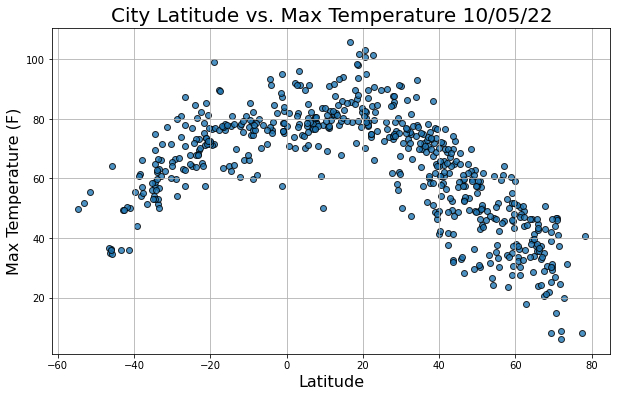

In [53]:
# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize = (10, 6))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"), fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

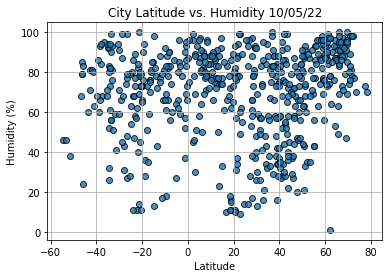

In [56]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

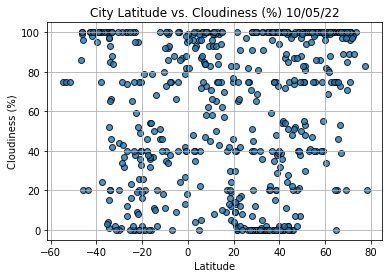

In [57]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

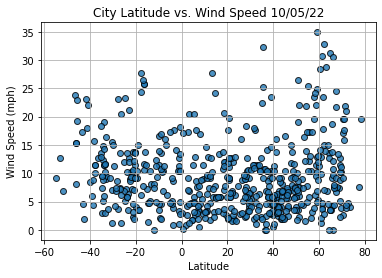

In [58]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()